## Part 1

In [1]:
import pandas as pd
df = pd.read_csv('toluca.csv')
df

,lotSize,workHours
0,80,399
1,30,121
2,50,221
3,90,376
4,70,361
5,60,224
6,120,546
7,80,352
8,100,353
9,50,157


### Plot predictor against target

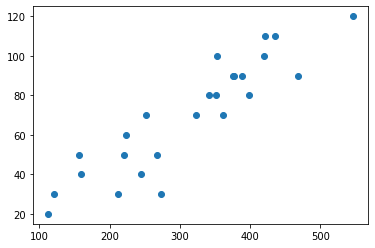

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(df.iloc[:,1], df.iloc[:,0], alpha=1)

### Plot residual

[Text(0, 0.5, 'Residual'), Text(0.5, 0, 'workHours')]

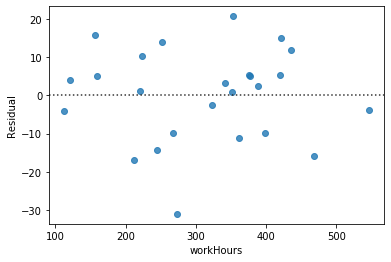

In [9]:
import seaborn as sns

rl = sns.residplot('workHours', 'lotSize', data=df)
rl.set(xlabel='workHours', ylabel='Residual')

In [10]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(df.drop('lotSize', axis=1), df.iloc[:,0])
reg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
# y = reg.coef_ * x + reg.intercept_
print(reg.coef_)
print(reg.intercept_)

[0.2301084]
-1.858251142306358


### MSE

In [12]:
import numpy as np
from sklearn.metrics import mean_squared_error 
predict = reg.predict(df.drop('lotSize', axis = 1))
mse = mean_squared_error(df.iloc[:, 0], predict)
np.sqrt(mse)


11.88888086607703

#### The residual polt looks random and the mse is relatively small, so the the predictor is suitable for the SLR.

## Part2

In [16]:
import pandas as pd
credit = pd.read_csv('Credit.csv')
credit

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331
...,...,...,...,...,...,...,...,...,...,...,...,...
395,396,12.096,4100,307,3,32,13,Male,No,Yes,Caucasian,560
396,397,13.364,3838,296,5,65,17,Male,No,No,African American,480
397,398,57.872,4171,321,5,67,12,Female,No,Yes,Caucasian,138
398,399,37.728,2525,192,1,44,13,Male,No,Yes,Caucasian,0


### Plot predictors against target

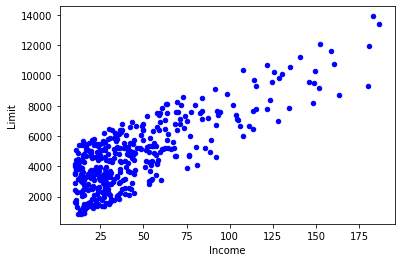

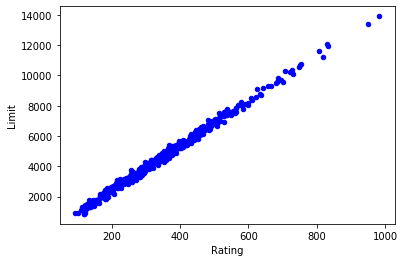

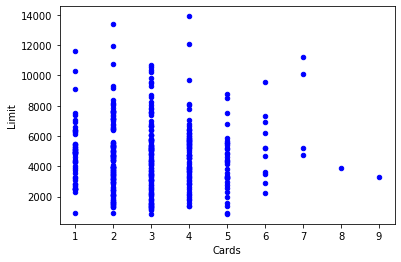

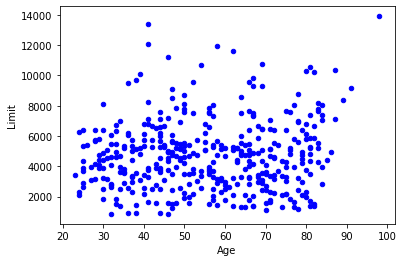

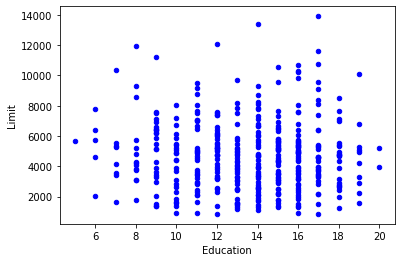

In [23]:
predictors = ['Income', 'Rating', 'Cards', 'Age', 'Education']
import matplotlib.pyplot as plt
%matplotlib inline

credit.plot(kind='scatter',x='Income',y='Limit',color='blue')
credit.plot(kind='scatter',x='Rating',y='Limit',color='blue')
credit.plot(kind='scatter',x='Cards',y='Limit',color='blue')
credit.plot(kind='scatter',x='Age',y='Limit',color='blue')
credit.plot(kind='scatter',x='Education',y='Limit',color='blue')
plt.show()



### Plot Residul

In [31]:
predictator = credit[['Income', 'Rating', 'Cards', 'Age', 'Education']]
target = credit['Limit']
# Standardise the data
from sklearn.preprocessing import StandardScaler

std_x = StandardScaler().fit_transform(predictator.values)

In [33]:
# PCA transformation
from sklearn.decomposition import PCA

pca = PCA(n_components = 1).fit_transform(std_x)
pca_feature = pd.DataFrame(data = pca, columns = ['feature'])
pca_feature

,feature
0,-1.193447
1,2.087034
2,2.143073
3,3.252685
4,0.312905
...,...
395,-1.168914
396,-0.752571
397,0.336119
398,-1.076514


[Text(0, 0.5, 'Residual'), Text(0.5, 0, 'feature')]

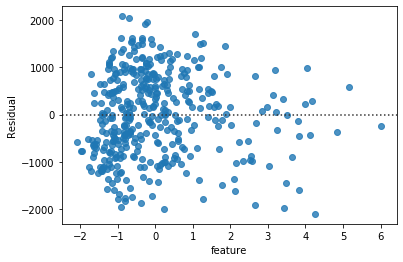

In [34]:
# plot
import seaborn as sns

residual_df = pca_feature
residual_df['Limit'] = target
residul = sns.residplot('feature', 'Limit', data=residual_df)
residul.set(xlabel='feature', ylabel='Residual')

### Linear regression

In [35]:
y = credit['Limit']
x = credit[['Income', 'Rating', 'Cards', 'Age', 'Education']]

In [36]:
linear_reg = LinearRegression()
linear_reg.fit(x, y)
linear_reg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
print(linear_reg.coef_)
print(linear_reg.intercept_)
linear_reg.score(x,y)

[  0.11840443  14.88695412 -71.73062805  -0.07547057   3.24917451]
-381.08641789899593


0.9956302928910165

### MSE

In [38]:
import numpy as np
from sklearn.metrics import mean_squared_error 
pre = linear_reg.predict(x)
mse_credit = mean_squared_error(y, pre)
np.sqrt(mse_credit)

152.38977791747266

#### The mse is relatively low and from the residual plot, it's random. We can also see from the scatter plot that most of the features show strong linear relation. So the predictor is suitable.